In [1]:
import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

import explore_utils
from prepare_utils import split_data

import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w

In [50]:
df.columns

Index(['parcelid', 'id', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude',
       'longitude', 'roomcnt', 'numberofstories', 'yearbuilt', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'taxvaluedollarcnt', 'transactiondate'],
      dtype='object')

In [2]:
df = w.prep_zillow()

In [3]:
train, _, _ = split_data(df, validate_size=.15, test_size=.15, 
                         stratify_col='county', random_state=123)

In [4]:
train = train[['bathrooms', 'bedrooms', 'county',
               'sqft', 'age', 'property_value']]

In [8]:
explore_utils.get_cat_and_cont_cols(train)

(['bathrooms', 'bedrooms', 'county'], ['sqft', 'age', 'property_value'])

**Univariate Analysis**

- categorical counts and frequencies
- numerical stats for continuous features and target

BATHROOMS


,bathrooms,Count,Frequency
0,2.00,14578,0.46
1,3.00,6780,0.22
2,1.00,5271,0.17
3,2.50,2649,0.08
4,4.00,1066,0.03
5,1.50,552,0.02
6,3.50,499,0.02


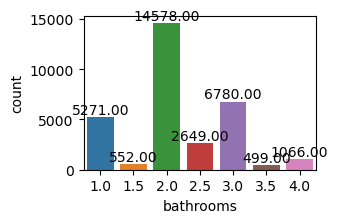


BEDROOMS


,bedrooms,Count,Frequency
0,3,15014,0.48
1,4,9466,0.30
2,2,5098,0.16
3,5,1817,0.06


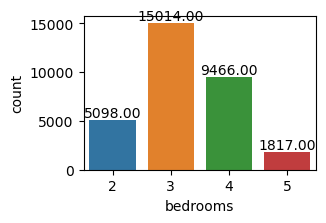


COUNTY


,county,Count,Frequency
0,LA,20117,0.64
1,Orange,8513,0.27
2,Ventura,2765,0.09


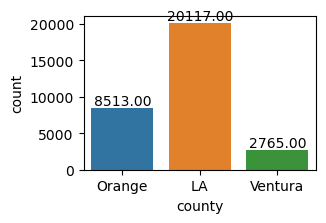

In [9]:
explore_utils.explore_univariate_categorical_cols(train)

Descriptive Stats:



,sqft,property_value,age
count,31395.00,31395.00,31395.00
mean,1777.20,414625.58,52.50
std,676.90,285793.91,21.14
min,500.00,50067.00,1.00
25%,1277.00,196456.00,39.00
50%,1627.00,359103.00,55.00
75%,2144.00,559000.00,65.00
max,4997.00,1500000.00,105.00


------------------------------------------------------------ 
 SQFT 

Most Frequent Values:
1120    77
1200    76
1176    57
Name: sqft, dtype: int64


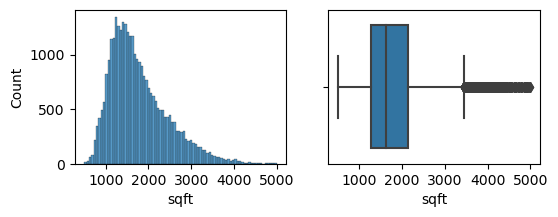


------------------------------------------------------------ 
 PROPERTY_VALUE 

Most Frequent Values:
600000    22
455000    20
550000    18
Name: property_value, dtype: int64


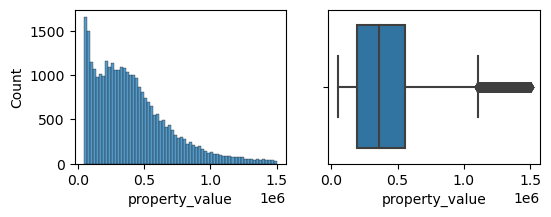


------------------------------------------------------------ 
 AGE 

Most Frequent Values:
61    1204
66    1033
62     981
Name: age, dtype: int64


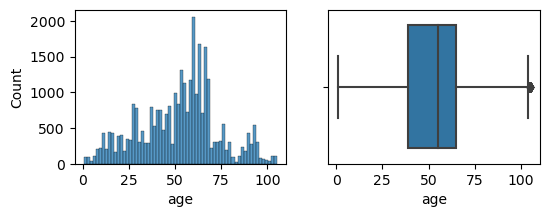

In [10]:
explore_utils.explore_univariate_continuous_cols(train,
                                                 cont_cols=['sqft', 'property_value', 'age'])

Notes:

- sqft and value distributions are right-skewed.

- Typical home:
    - is 3bed/2bath
    - in LA county
    - 1000-2000 sqft
    - 100k-500k

**Bivariate Stats**

- A. Property value correlations with continuous features
- B. Property value for each category

A.

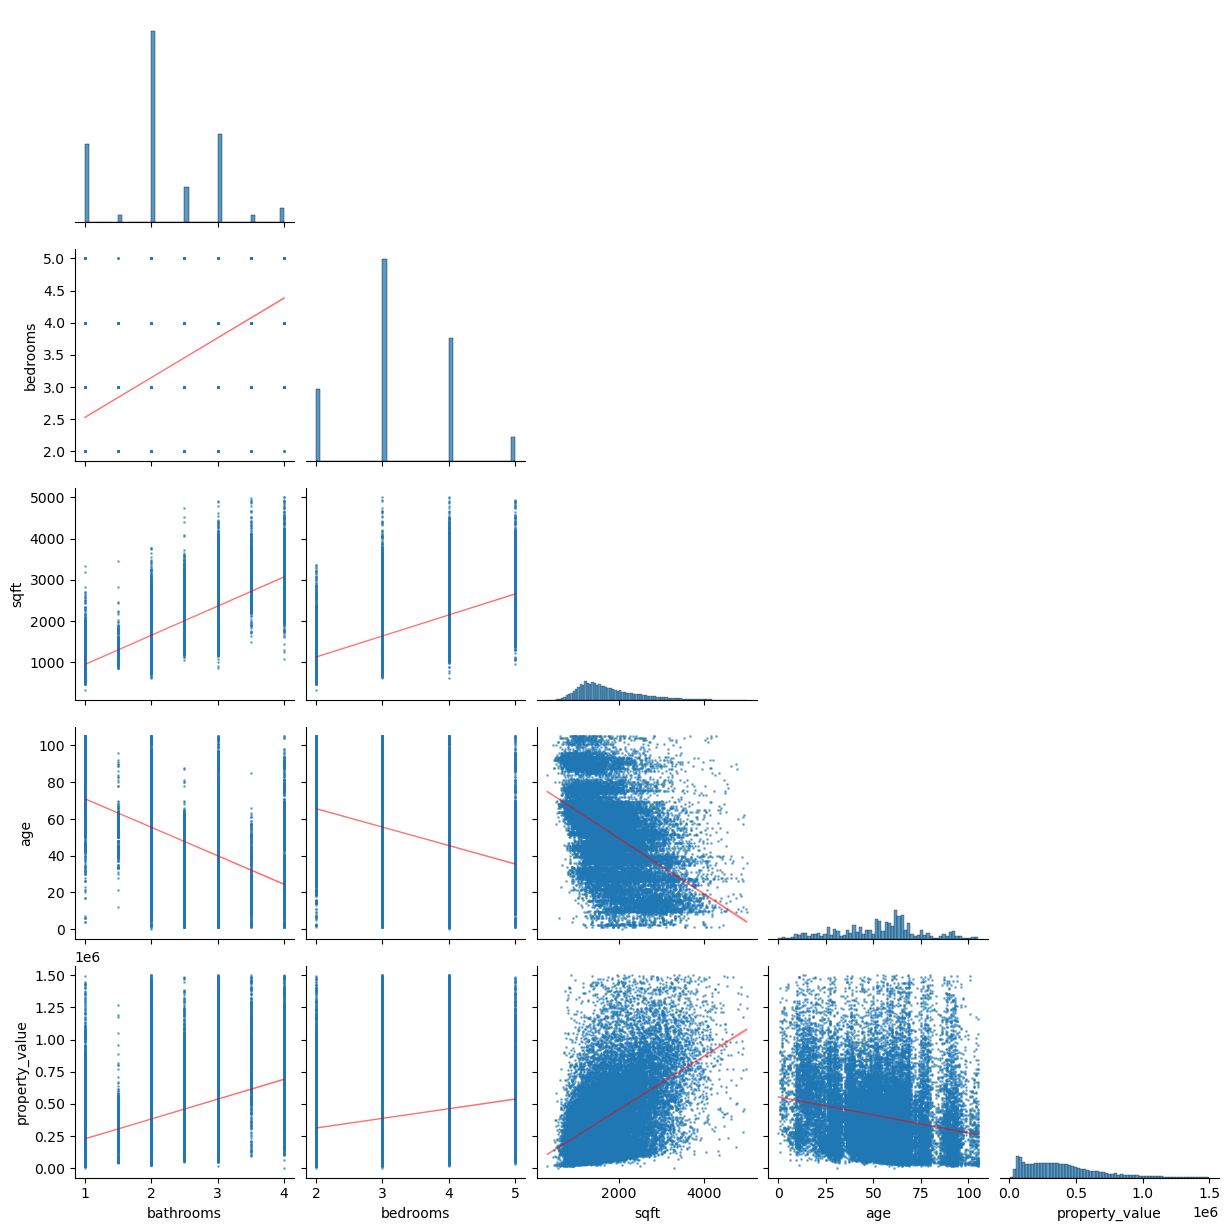

In [26]:
sns.pairplot(data=train, kind='reg', corner=True,
             plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                       'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/2950996863.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/2950996863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


<Axes: >

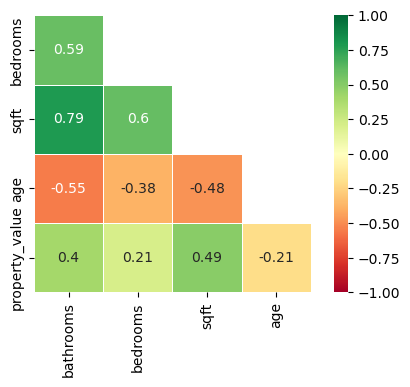

In [28]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/925584279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()['property_value'].sort_values(ascending=False).to_frame(),


<Axes: >

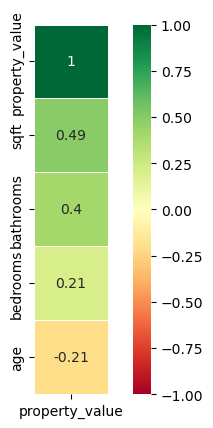

In [29]:
sns.heatmap(train.corr()['property_value'].sort_values(ascending=False).to_frame(),
            linewidths=.5, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1, square=True)

In [37]:
def explore_bivariate_cont_to_cont_target(df, target, cont_cols=None):
    if cont_cols == None:
        cont_cols = get_cat_and_cont_cols(df)[1]
    
    sns.pairplot(data=df[cont_cols], kind='reg', corner=True,
                 plot_kws={'scatter_kws':{'s':1, 'alpha':.5},
                           'line_kws':{'linewidth':1, 'alpha':.5, 'color':'red'}})
    plt.show()
    
    plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

    mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
    sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                         cmap='RdYlGn', vmin=-1, vmax=1, square=True)
    plt.show()
    
    sns.heatmap(df.corr()[target].sort_values(ascending=False).to_frame(),
            linewidths=.5, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1, square=True)
    plt.show()

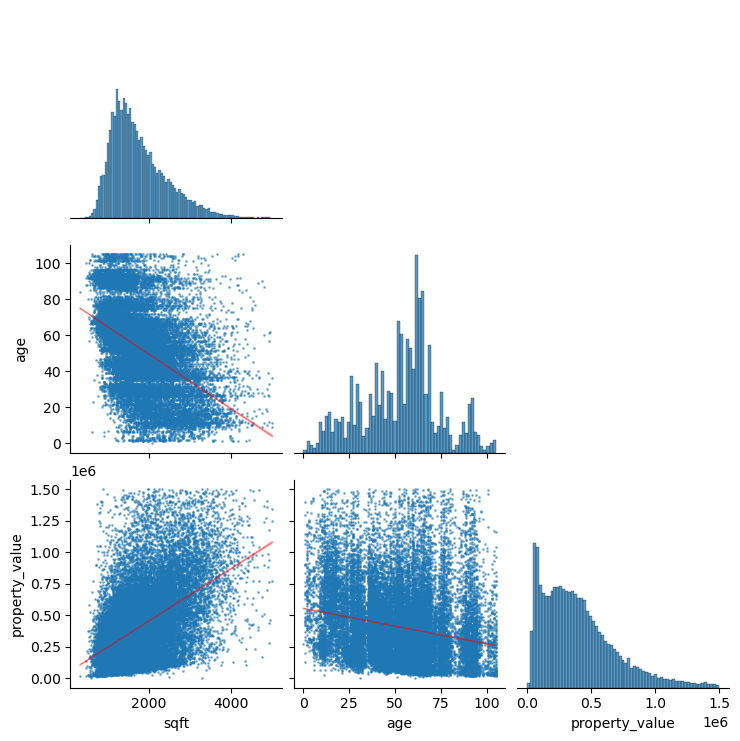

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/2560597825.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/2560597825.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


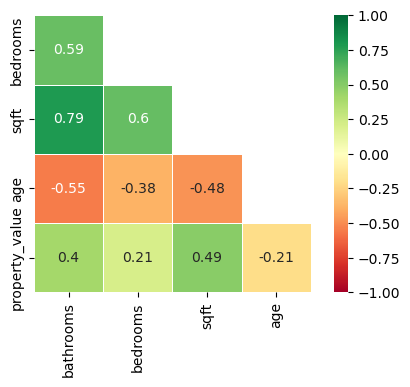

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_9139/2560597825.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[target].sort_values(ascending=False).to_frame(),


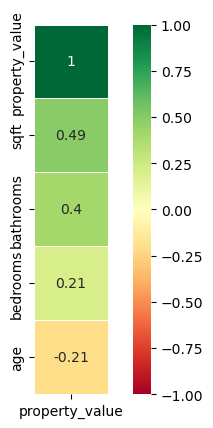

In [38]:
explore_bivariate_cont_to_cont_target(train, 'property_value', cont_cols=['sqft', 'age', 'property_value'])

B.

In [42]:
cat_cols = ['bathrooms', 'bedrooms', 'county']
for col in cat_cols:
    display(train.groupby(col)['property_value'].describe().T)

bathrooms,1.00,1.50,2.00,2.50,3.00,3.50,4.00
count,5996.00,554.00,14705.00,2653.00,6772.00,526.00,1061.00
mean,272432.43,301392.56,347348.32,517643.52,521841.93,850587.48,740274.39
std,214297.71,177401.84,249852.18,247887.49,303183.34,314639.35,349647.80
min,3254.00,40275.00,21071.00,47416.00,13352.00,94107.00,1000.00
25%,103755.25,174332.25,146803.00,344316.00,282166.50,631496.50,466568.00
50%,236378.50,291320.50,305763.00,507000.00,478506.50,859746.00,733362.00
75%,371015.25,409482.75,472301.00,673000.00,709394.75,1084989.00,1000863.00
max,1493861.00,1270326.00,1500000.00,1483677.00,1500000.00,1500000.00,1500000.00


bedrooms,2,3,4,5
count,5491.00,15516.00,9439.00,1821.00
mean,325515.57,377157.55,468843.16,540089.04
std,253977.69,271888.73,306114.32,317686.43
min,3254.00,1000.00,15890.00,32257.00
25%,140108.00,168800.50,229570.50,296643.00
50%,271191.00,330322.50,420049.00,501609.00
75%,434113.50,508000.00,646669.50,739082.00
max,1493861.00,1500000.00,1500000.00,1489000.00


county,LA,Orange,Ventura
count,20862.00,8600.00,2805.00
mean,367969.93,475882.16,456014.27
std,283970.17,292856.95,259440.24
min,1000.00,20422.00,15433.00
25%,155923.25,258621.50,281228.00
50%,300277.50,441473.00,433497.00
75%,491067.25,650000.00,590640.00
max,1500000.00,1499208.00,1500000.00


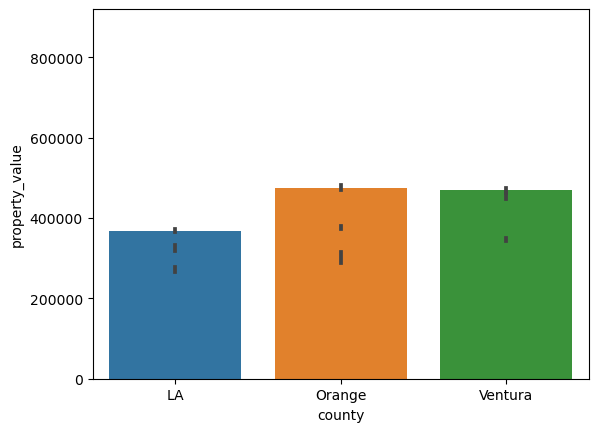

In [44]:
for col in cat_cols:
    sns.barplot(data=train, x=col, y='property_value')

In [ ]:

for col in cat_cols:
    sns.stripplot(data=df, x=col, y='property_value', hue=col, jitter=.3,
              size=1, legend=False)

In [ ]:
def explore_bivariate_cat_to_cont_target():
    
    
def plot_bivariate_cat_to_cont_target_charts():
    